# Random Forest Regressor
Is a flexible, easy to use machine learning algorithm that produces, even without hyper-parameter tuning, a great result most of the time. It is also one of the most used algorithms, because of its simplicity and diversity (it can be used for both classification and regression tasks). 

Random forest is a supervised learning algorithm. The "forest" it builds, is an ensemble of decision trees, usually trained with the “bagging” method. The general idea of the bagging method is that a combination of learning models increases the overall result.

Random forest adds additional randomness to the model, while growing the trees. Instead of searching for the most important feature while splitting a node, it searches for the best feature among a random subset of features. This results in a wide diversity that generally results in a better model.

Therefore, in random forest, only a random subset of the features is taken into consideration by the algorithm for splitting a node. You can even make trees more random by additionally using random thresholds for each feature rather than searching for the best possible thresholds (like a normal decision tree does).

The hyperparameters in random forest are either used to increase the predictive power of the model or to make the model faster. Let's look at the hyperparameters of sklearns built-in random forest function.

1. Increasing the predictive power

Firstly, there is the n_estimators hyperparameter, which is just the number of trees the algorithm builds before taking the maximum voting or taking the averages of predictions. In general, a higher number of trees increases the performance and makes the predictions more stable, but it also slows down the computation.

Another important hyperparameter is max_features, which is the maximum number of features random forest considers to split a node. Sklearn provides several options, all described in the documentation.

The last important hyperparameter is min_sample_leaf. This determines the minimum number of leafs required to split an internal node.

2. Increasing the model's speed

The n_jobs hyperparameter tells the engine how many processors it is allowed to use. If it has a value of one, it can only use one processor. A value of “-1” means that there is no limit.

The random_state hyperparameter makes the model’s output replicable. The model will always produce the same results when it has a definite value of random_state and if it has been given the same hyperparameters and the same training data.

Lastly, there is the oob_score (also called oob sampling), which is a random forest cross-validation method. In this sampling, about one-third of the data is not used to train the model and can be used to evaluate its performance. These samples are called the out-of-bag samples. It's very similar to the leave-one-out-cross-validation method, but almost no additional computational burden goes along with it.

In [17]:
import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

from subprocess import check_output
from datetime import time

import joblib

In [2]:
def time_to_sec(time):
    return time.hour * 3600 + time.minute * 60 + time.second

In [5]:
df = pd.read_csv('data.csv')
df = df.drop('date', axis=1)

noon = time_to_sec(time(12,0,0))
df.timestamp = df.timestamp.apply(lambda t: abs(noon - t))
cols = ['day_of_week', 'month','hour']
df = pd.get_dummies(df, columns=cols)
df.head(10)

,number_people,timestamp,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,day_of_week_0,day_of_week_1,day_of_week_2,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,37,18011,0,0,71.76,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,45,19214,0,0,71.76,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,40,19815,0,0,71.76,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,44,20416,0,0,71.76,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,45,21017,0,0,71.76,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5,46,21618,0,0,72.15,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6,43,22808,0,0,72.15,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
7,53,23409,0,0,72.15,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8,54,24014,0,0,72.15,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9,43,24615,0,0,72.15,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


## Splitting

In [6]:
data = df.values
X = data[:,1:]
y = data[:, 0]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

In [10]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
model = RandomForestRegressor(n_jobs=-1)

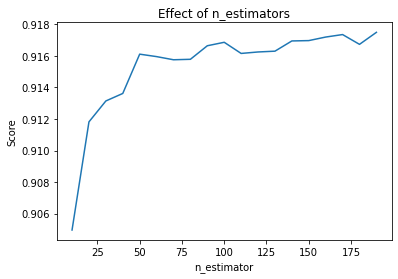

In [13]:
estimators = np.arange(10,200,10)
scores = []

for n in estimators:
    model.set_params(n_estimators = n)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
    
plt.title('Effect of n_estimators')
plt.xlabel('n_estimator')
plt.ylabel('Score')
plt.plot(estimators, scores)

In [14]:
scores

[0.904965161621496,
 0.9118204601385175,
 0.913146597464358,
 0.9136221766448838,
 0.9161136523998589,
 0.9159579093444614,
 0.9157582446042556,
 0.9157878117580017,
 0.9166463174945434,
 0.9168660838493415,
 0.9161594084673464,
 0.9162522267468638,
 0.9163027878800394,
 0.9169509912111625,
 0.9169733349492711,
 0.9171977051018263,
 0.917355817700503,
 0.9167356076120036,
 0.9174968973746069]

In [18]:
joblib.dump(model, 'random_forest_regressor_model')

['random_forest_regressor_model']

In [19]:
!ls

'Random Forest Regressor Portfolio.ipynb'   data.csv.zip
 Twitter_Mayo_clean.csv			    funnelFinal.csv
 data.csv				    random_forest_regressor_model
